In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# NO 1

In [2]:
df_car = pd.read_csv("all_cars.csv")

# Jika ada kolom 'Unnamed: 0', ubah jadi 'id'
if 'Unnamed: 0' in df_car.columns:
    df_car = df_car.rename(columns={'Unnamed: 0': 'id'})
else:
    df_car = df_car.reset_index().rename(columns={'index': 'id'})

df_car.head()

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


# NO 2

In [3]:
df_car.describe(include='all')

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,22266.000000,22266,22266,22266.000000,22266.000000,22266,22266.000000,22266,22266.000000,22266.000000,22266.000000
unique,NaN,3,60,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,NaN,Audi,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,NaN,10668,2122,NaN,NaN,11806,NaN,12052,NaN,NaN,NaN
mean,11132.500000,NaN,NaN,2016.995509,17542.591575,NaN,23501.863604,NaN,115.473592,55.151181,1.688489
std,6427.784883,NaN,NaN,2.133576,10589.835312,NaN,21111.157417,NaN,68.835239,14.834181,0.566379
min,0.000000,NaN,NaN,1997.000000,850.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000
25%,5566.250000,NaN,NaN,2016.000000,9999.000000,NaN,7200.000000,NaN,30.000000,44.800000,1.400000
50%,11132.500000,NaN,NaN,2017.000000,14999.000000,NaN,18354.000000,NaN,145.000000,55.400000,1.600000
75%,16698.750000,NaN,NaN,2019.000000,21991.000000,NaN,33100.750000,NaN,145.000000,62.800000,2.000000


# NO 3

In [ ]:
print(df_car.dtypes)

qualitative_cols = df_car.select_dtypes(include='object').columns.tolist()
quantitative_cols = df_car.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Kolom Kualitatif:", qualitative_cols)
print("Kolom Kuantitatif:", quantitative_cols)

print("Nominal:", [col for col in qualitative_cols if col in ['brand', 'model', 'fuelType', 'transmission']])
print("Ordinal: (isi jika ada kolom ordinal)")
print("Continuous:", [col for col in quantitative_cols if col in ['price', 'mileage']])
print("Discrete:", [col for col in quantitative_cols if col in ['year']])

id                int64
brand            object
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object
Kolom Kualitatif: ['brand', 'model', 'transmission', 'fuelType']
Kolom Kuantitatif: ['id', 'year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


# NO 4

In [ ]:
# Ukuran pemusatan data
print("Central Tendency kolom 'model' (mode):", df_car['model'].mode()[0])
print("Central Tendency kolom 'price':")
print(" - Mean:", df_car['price'].mean())
print(" - Median:", df_car['price'].median())
print(" - Mode:", df_car['price'].mode()[0])

Central Tendency kolom 'model' (mode): Yaris
Central Tendency kolom 'price':
 - Mean: 17542.591574598042
 - Median: 14999.0
 - Mode: 9995


# NO 5

In [6]:
print("Range:", df_car['price'].max() - df_car['price'].min())
print("Variance:", df_car['price'].var())
print("Std Dev:", df_car['price'].std())
print("IQR:", stats.iqr(df_car['price']))

Range: 144150
Variance: 112144611.93109098
Std Dev: 10589.835311802115
IQR: 11992.0


# NO 6

In [8]:
Q1 = df_car['price'].quantile(0.25)
Q3 = df_car['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = df_car[(df_car['price'] < lower_bound) | (df_car['price'] > upper_bound)]
print("Jumlah outlier di kolom price:", outliers_price.shape[0])

Jumlah outlier di kolom price: 808


# NO 7

In [9]:
skewness = df_car[quantitative_cols].skew()
print("Skewness tiap kolom:\n", skewness)
print("Kolom yang skewed ke kanan (>0.5):\n", skewness[skewness > 0.5])

Skewness tiap kolom:
 year         -1.749698
price         2.307306
mileage       1.704350
tax           0.146389
mpg           2.439082
engineSize    1.184779
dtype: float64
Kolom yang skewed ke kanan (>0.5):
 price         2.307306
mileage       1.704350
mpg           2.439082
engineSize    1.184779
dtype: float64


# NO 8

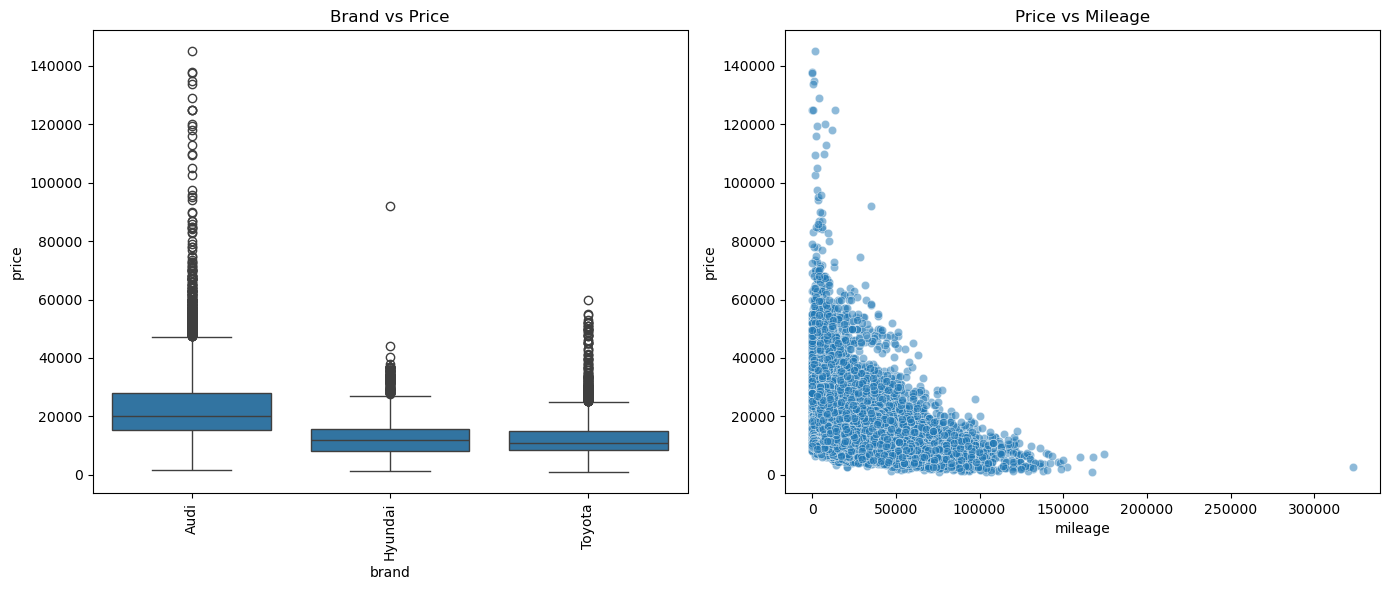

In [10]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='brand', y='price', data=df_car)
plt.xticks(rotation=90)
plt.title("Brand vs Price")

plt.subplot(1,2,2)
sns.scatterplot(x='mileage', y='price', data=df_car, alpha=0.5)
plt.title("Price vs Mileage")

plt.tight_layout()
plt.show()

# NO 9

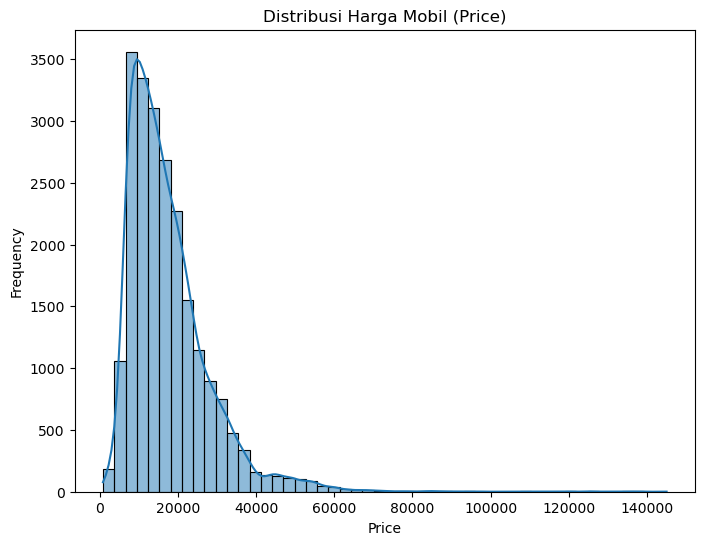

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(df_car['price'], bins=50, kde=True)
plt.title("Distribusi Harga Mobil (Price)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()